## Demonstration
Testing trained model outputs with one image and labels from the dataset

### Installation and Imports

In [69]:
%pip install tensorflow==2.10

%pip install matplotlib
%matplotlib inline

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [70]:
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import tensorflow as tf

### Image and Label Loading

In [71]:
# Load the data
x_input_combined = np.load('prepared_data/x_input_combined.npy')
y_output_combined = np.load('prepared_data/y_output_combined.npy')

# Choose an index to extract (e.g., the first image)
index = 1
single_image = x_input_combined[index]
single_label = y_output_combined[index]


print(f'X Training Data\nNumber of Rows: {x_input_combined.shape[0]}\nPixel Dimensions: {x_input_combined.shape[1]}x{x_input_combined.shape[2]}x{x_input_combined.shape[3]}\n')
# print(f'X Training Data\nNumber of Rows: {single_image_expanded.shape[0]}\nPixel Dimensions: {single_image_expanded.shape[1]}x{single_image_expanded.shape[2]}x{single_image_expanded.shape[3]}\n')

X Training Data
Number of Rows: 1920
Pixel Dimensions: 224x224x3



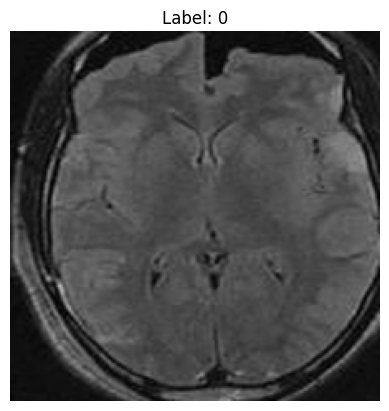

In [72]:
plt.imshow(single_image)
plt.title(f'Label: {single_label}')
plt.axis('off')
plt.show()

### Model Testing


In [73]:
# Define the function to predict the label using a saved model
def predict_image_label(model_path, single_image, class_names, image_shape):
    # Load the model
    model = load_model(model_path)
    
    # Preprocess the image
    single_image_expanded = np.expand_dims(single_image, axis=0)
    # Resize image according to model specification
    if(image_shape != (224,224,3)):
        single_image_expanded = tf.image.resize(single_image_expanded, (image_shape[0], image_shape[1]))
    
    # Predict the label for the single image
    prediction = model.predict(single_image_expanded)
    predicted_label_index = np.argmax(prediction, axis=1)
    
    # Get the predicted label and confidence
    predicted_label = class_names[predicted_label_index[0]]
    confidence = np.max(prediction) * 100

    return predicted_label, confidence

#### For VGG16 & VGG19

In [74]:
# Class labels
class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Predict and display the results for VGG16
predicted_label_vgg16, confidence_vgg16 = predict_image_label('model_checkpoints/vgg16_brain_tumor.keras', single_image, class_names, (224, 224, 3))
print(f'VGG16 Predicted Label: {predicted_label_vgg16}')
print(f'VGG16 Prediction Confidence: {confidence_vgg16:.2f}%')

# Predict and display the results for VGG19
predicted_label_vgg19, confidence_vgg19 = predict_image_label('model_checkpoints/vgg19_brain_tumor.keras', single_image, class_names, (224, 224, 3))
print(f'VGG19 Predicted Label: {predicted_label_vgg19}')
print(f'VGG19 Prediction Confidence: {confidence_vgg19:.2f}%')

1/1 [==============================] - 0s 74ms/step
VGG16 Predicted Label: glioma
VGG16 Prediction Confidence: 100.00%
1/1 [==============================] - 0s 99ms/step
VGG19 Predicted Label: glioma
VGG19 Prediction Confidence: 99.98%


#### For ResNet50

In [75]:
# Predict and display the results for ResNet50
predicted_label_resnet50, confidence_resnet50 = predict_image_label('model_checkpoints/resnet50_brain_tumor_model.keras', single_image, class_names, (224, 224, 3))
print(f'ResNet50 Predicted Label: {predicted_label_resnet50}')
print(f'ResNet50 Prediction Confidence: {confidence_resnet50:.2f}%')

1/1 [==============================] - 0s 395ms/step
ResNet50 Predicted Label: glioma
ResNet50 Prediction Confidence: 100.00%


#### For InceptionV3

In [76]:
# Predict and display the results for ResNet50
predicted_label_inceptionv3, confidence_inceptionv3 = predict_image_label('model_checkpoints/inceptionv3_brain_tumor_model.keras', single_image, class_names, (299, 299, 3))
print(f'InceptionV3 Predicted Label: {predicted_label_inceptionv3}')
print(f'InceptionV3 Prediction Confidence: {confidence_inceptionv3:.2f}%')

1/1 [==============================] - 1s 552ms/step
InceptionV3 Predicted Label: glioma
InceptionV3 Prediction Confidence: 99.94%
